# NLP Lab 2 / Text classification

You may work by pairs. There is no increase of grade or compensation if you work alone. 
Please first indicate whom you work with in the cell above:

Your answer here : worked with Matthieu Sousa Ferreira & Baptiste Rozan

# 0. Submission instructions

The due date of this lab is October 13h, 23:59. Late deliveries will be penalized 1pt/day. 

Please visit https://mvproxy.esiee.fr (disregard the security warning, the certificate is self-signed). When visiting for the first time, provide your ESIEE login, but leave the password field empty, and click on "Connexion". You should then receive an email containing your mvproxy password (check your SPAM folder if you don't).

Visit https://mvproxy.esiee.fr a second time, but now fill in both your ESIEE login and mvproxy password. You should be logged in.

Drop a ZIP archive containing :
- This notebook (lab2.ipynb), filled with answers to the questions ;
- and a *local* copy of the text articles or CSV files you are working with, which you should access to relatively and not absolutely. 

Please pay attention to the latter point. Code like
```
csv.reader('C:\Users\Yoyodyne\My Documents\AIC-5102B\Lab2 Text Classification/dataset.csv')
```

should be banned, and replaced by
```
csv.reader('dataset.csv')
```
or
```
csv.read('./data/class1.csv')
csv.read('./data/class2.csv')
```

I should be able to run your code on *Linux* after sourcing <t>~/pynlp/bin/activate</t> , without modifying the 'C:\Users\Yoyodyne\My Documents\AIC-5102B' path, which I don't have access to, nor changing anything else in your notebook as I run it. You must also stick to NLTK, and packages I include myself in the following code snippets.


## 1. Setup

This lab must be done on Linux Debian 12, under the Python virtual environment [decribed here](https://perso.esiee.fr/~hilairex/NLP/docker-fc39.html). You may also use the Docker container described in this document if you prefer, but the Python venv is enough.

It is all about text classification, and your first task will consist in selecting a dataset.

Please visit https://www.kaggle.com/datasets?search=text+classification in order to choose a dataset you like (or randomly, if you don't known which one to choose). We will attempt to separate samples from 2 classes only, so you may either choose between a dataset that has natively 2 classes only (spam/non spam email, positive/negative review, etc.) or one that has natively $n > 2$ classes, but two only of which will be used (e.g. politics/cooking, or sport/computer articles).

Which dataset and classes did you chose ? Plesase give your answer below with its related URL, and copy the related files to your working directory.


Dataset : SMS Spam collection

classes : spam / not spam

https://www.kaggle.com/datasets/thedevastator/sms-spam-collection-a-more-diverse-dataset


In [6]:
!pip install pandas

ERROR: Operation cancelled by user
^C


In [10]:
import pandas as pd

pd.read_csv('sms-spam-collection-a-more-diverse-dataset/train.csv', encoding='latin-1').head()


,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


## 2. Text vectorization

The following functions :
- extract the vocabulary from a CSV file assuming the text is located in column number 5
- build the document-term matrix by reading again the same CSV file

Adapt them, so that they fit your dataset and produce a document-term matrix in the end.

Please note that:
- the tokenization method used is wordpunct_tokenize(), which may not be optimal. You may call something different in case you find too much garbage in your resulting vocabulary.
- there are two "if" tests in dtmat_from_file which appear unnecessary so far. They are, indeed, because the test samples may include unseen words, which would generate out-of-bounds index. So unseen words are just ignored.
- you may also consider lemmatizing. 

In [11]:
import csv
import nltk
import numpy as np
import sys
from nltk.tokenize import TweetTokenizer

tweet_tokenizer = TweetTokenizer(preserve_case=True, reduce_len=True)
def voc_from_csv(csvfile):
    nlines=0
    voc=[]
    with open(csvfile, errors='ignore') as file:
        reader=csv.reader(file, delimiter=',')
        for row in reader:
            nlines=nlines+1
            voc.extend(tweet_tokenizer.tokenize(row[0]))
    voc=sorted(set(voc))        
    return voc,nlines

def dtmat_from_csv(csvfile):
    voc,rows=voc_from_csv(csvfile)
    cols=len(voc)
    mat=np.zeros((rows,cols))
    d=0
    with open(csvfile,  errors='ignore') as file:
        reader=csv.reader(file, delimiter=',')
        for row in reader:
            w= nltk.wordpunct_tokenize(row[0])
            X=np.searchsorted(voc,w,side='left')            
            for i in range(0,len(w)):
                if (X[i] < cols):
                    if (w[i] == voc[X[i]]):
                        mat[d][X[i]]+=1
            d=d+1
    return mat


In [17]:
csv_path = 'sms-spam-collection-a-more-diverse-dataset/train.csv'
vocab = voc_from_csv(csv_path)
dtmat = dtmat_from_csv(csv_path)

In [12]:
print(vocab)
print(dtmat)

(['!', '"', '#', '#150', '#5000', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '. .', '. . .', '. . . .', '. . . . .', '. ..', '..', '.. .', '.. . . .', '.. ... ...', '...', '... . . . .', '/', '0', '00', '00870405040', '0089', '01', '0121 2025050', '01223585236', '01223585334', '01256987', '02', '02/06', '02/09', '0207 153 9153', '0207 153 9996', '0207-083-6089', '02072069400', '02073162414', '02085076972', '03', '03530150', '04', '04/09', '05', '050703', '06', '06.05', '06/11', '07/11', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '07123456789', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '078498', '07880867867', '0789xxx', '07946746291', '0796XXX', '07973788240', '07XXX', '07xxx', '08', '0800', '0800 0721072', '0800 169 6031', '0800 195 6669', '0800 1956669', '0800 5050', '0800 542 0578', '0800 542 0825

### Question 1 

Run dtmat_from_csv on your dataset, or on a sample drawn from it if it is very large. Examine the resulting matrix. How many times does it happen that a given word is seen only once (possibly twice) in your training set ? Give a few Python code lines which show this below.

In [13]:
# Calculer la fréquence totale de chaque mot dans le corpus
total_counts = np.sum(dtmat, axis=0)

# Indices des mots vus une seule fois
once_indices = np.where(total_counts == 1)[0]
# Indices des mots vus deux fois
twice_indices = np.where(total_counts == 2)[0]

# Afficher quelques exemples de mots vus une seule ou deux fois
print("Mots vus une seule fois :", [vocab[0][i] for i in once_indices[:10]])
print("Mots vus deux fois :", [vocab[0][i] for i in twice_indices[:10]])

# Nombre total de mots vus une seule fois
print("Nombre de mots vus une seule fois :", len(once_indices))
# Nombre total de mots vus deux fois
print("Nombre de mots vus deux fois :", len(twice_indices))

Mots vus une seule fois : ['0089', '01223585236', '02072069400', '02085076972', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '07732584351']
Mots vus deux fois : ['01223585334', '02073162414', '050703', '07123456789', '07734396839', '07742676969', '07786200117', '07821230901', '08', '08000407165']
Nombre de mots vus une seule fois : 5202
Nombre de mots vus deux fois : 1700


### Analyse des dimensions du problème

Les résultats montrent qu'un grand nombre de mots n'apparaissent qu'une ou deux fois dans le corpus. Ces mots rares (hapax legomena) n'apportent généralement pas d'information discriminante pour la classification et peuvent causer du surapprentissage (overfitting). C'est pourquoi il est recommandé de les filtrer, ce qui sera fait dans la Question 4 avec le paramètre `purge=True`.

In [18]:
# Calcul des dimensions du problème pour la Question 2
import csv
import nltk
from nltk.tokenize import TweetTokenizer


tweet_tokenizer = TweetTokenizer(preserve_case=True, reduce_len=True)

# Compter le nombre de documents
n_documents = 0
all_words = []

with open(csv_path, errors='ignore') as file:
    reader = csv.reader(file, delimiter=',')
    for row in reader:
        n_documents += 1
        words = tweet_tokenizer.tokenize(row[0])
        all_words.extend(words)

# Nombre de mots uniques dans le vocabulaire
d_vocabulary = len(set(all_words))

print("=" * 60)
print("DIMENSIONS DU PROBLÈME")
print("=" * 60)
print(f"n (nombre de documents)           : {n_documents:,}")
print(f"d (taille du vocabulaire)         : {d_vocabulary:,}")
print(f"Dimension de la matrice D-T       : {n_documents:,} × {d_vocabulary:,}")
print(f"Nombre total d'éléments           : {n_documents * d_vocabulary:,}")
print(f"Mémoire requise (dense, float64)  : {n_documents * d_vocabulary * 8 / (1024**2):.1f} MB")
print()
print(f"Rapport d/n                       : {d_vocabulary/n_documents:.2f}")
print(f"Problème: d {'>' if d_vocabulary > n_documents else '<='} n")
print()

# Estimation de la sparsité
avg_words_per_doc = len(all_words) / n_documents
sparsity = 100 * (1 - avg_words_per_doc / d_vocabulary)
non_zeros_total = n_documents * avg_words_per_doc

print(f"Mots moyens par document          : {avg_words_per_doc:.1f}")
print(f"Sparsité estimée                  : {sparsity:.2f}% de zéros")
print(f"Éléments non-zéros (estimé)       : {non_zeros_total:,.0f}")
print(f"Mémoire sparse (estimé)           : {non_zeros_total * 16 / (1024**2):.1f} MB")
print("=" * 60)

DIMENSIONS DU PROBLÈME
n (nombre de documents)           : 5,575
d (taille du vocabulaire)         : 11,382
Dimension de la matrice D-T       : 5,575 × 11,382
Nombre total d'éléments           : 63,454,650
Mémoire requise (dense, float64)  : 484.1 MB

Rapport d/n                       : 2.04
Problème: d > n

Mots moyens par document          : 18.4
Sparsité estimée                  : 99.84% de zéros
Éléments non-zéros (estimé)       : 102,628
Mémoire sparse (estimé)           : 1.6 MB


### Question 2

In this part, we are a interested in separating the two classes you chose by linear discriminant analysis (LDA). You have the choice between 3 strategies:

1. Use the direct formula $u=W^{-1}(m_1-m_2)$, as stated in [the course](https://perso.esiee.fr/~hilairex/AIC-5102B/complements.pdf), directly as such
2. Use the kernelized version of LDA, also explained in [the course](https://perso.esiee.fr/~hilairex/AIC-5102B/complements.pdf), the kernel of which will simply be $k(x,y) = <x,y>$ to comply with the statement
3. Use an alternative (possibly smarter) strategy

Remember that all that is requested here is to classify using LDA. As a clue, several methods are available to compute the $k$ highest eigenvalues/eigenvectors or singular values/singular vectors of an $m\times n$ matrix :
- if the matrix is sparse : Lanczos-like methods are quite efficient, with respective time and memory complexities of $O(nnz.k)$ and $O(nnz + (n+m)k)$. Python's <t>scipy.sparse.linalg.svds</t> does a good job.
- if the matrix is not sparse, but does not fit entirely into memory : the Dask package provides a similar time complexity, and an $O(block + (n+m)k)$ memory complexity

where $nnz$ is the total number number of non-zero components in the matrix, and $block$ is the size of the largest block of RAM you can allocate for computations. Also keep in mind that properly training a classifier normally requires cross-validation by repeated attempts using folded versions of the data.

This question does not require any programming, but a clever analysis of the problem. You should pay attention to the dimension of the problem you have at hand (shape of the document-term matrix, total number of words) and compare the time and memory complexities each solution will demand. Keep in mind that your resources are limited (ESIEE's machine typically have 32 GB of RAM, and about the same amount of user disk quota). 

Which strategy do you adopt, and why ? Write your answer below.

### Réponse : Stratégie 1 (sklearn.discriminant_analysis.LinearDiscriminantAnalysis)

**Analyse du problème :**

Pour le dataset SMS Spam, nous avons approximativement :
- $n \approx 5000$ documents (messages SMS)
- $d \approx 11000$ mots dans le vocabulaire (après tokenization)
- La matrice document-terme est de dimension $5000 \times 11000$

**Stratégie 3 : Utiliser sklearn.discriminant_analysis.LinearDiscriminantAnalysis**
- Utilise la SVD (décomposition en valeurs singulières) pour gérer le cas $d > n$
- Projette d'abord dans un sous-espace de dimension $\min(n, d)$ via SVD
- Complexité mémoire : $O(nd + n^2)$ (gère les matrices sparse efficacement)
- Complexité temporelle : $O(nd \min(n,d))$ avec la SVD
- **Avantages** : 
  - Implémentation optimisée et stable numériquement
  - Gère automatiquement le cas $d > n$ (shrinkage, SVD solver)
  - Support des matrices sparse si converties en dense (ou utilisation de QDA pour sparse)
  - Cross-validation facile avec scikit-learn

**Choix : Stratégie 3**

J'adopte la **Stratégie 3** en utilisant `sklearn.discriminant_analysis.LinearDiscriminantAnalysis` avec le solver SVD car :

1. **Praticité** : Implémentation robuste et testée, gère automatiquement les cas pathologiques
2. **Complexité raisonnable** : $O(nd \min(n,d)) \approx O(5000 \times 7000 \times 5000)$ est gérable
3. **Mémoire acceptable** : Environ 280 MB pour la matrice document-terme (dense) + overhead
4. **Cas $d > n$ géré** : La SVD projette dans un espace de dimension $n-c$ où $c$ est le nombre de classes
5. **Intégration** : Facilite la cross-validation avec `cross_val_score` et `GridSearchCV`
6. **Alternative** : Si la matrice est trop grande, on peut utiliser le paramètre `shrinkage='auto'` pour régulariser

Si les performances sont insuffisantes, on pourrait envisager une réduction de dimensionnalité préalable (TF-IDF + TruncatedSVD) ou passer à la Stratégie 2 (K-FDA) avec un kernel non-linéaire.

### Question 3

We return to question 1 for a while.  Suppose that the number of "seen only once" words becomes larger than the total number of documents. a) What will be the predicted direction by LDA in such a case ? 
b) What will be the recognition accuracy in case you reuse part of the training data as test data ?
c) What will it be in case you don't ?

A) chaque doc contient au moins un mot qui est vue une seul fois dans le corpus. la dimensions est egale au vocabulaire et la droite de la LDA aura un vecteur directeur de la dimension du vocabulaire et sera constitué de la premier moitier avec des 1 et la deuxieme -1 ou inversement 


(-1,-1,-1,1,1,1)


B) si on entraine le model LDA avec des docs qui ne contiennent que des mots vue une fois dans le corpus et que l'on test le model sur l'entrainement alors le resultat de la train accuracy sera de 100% acause du overfitting le model manque terriblement de generalité 


C) si on entraine le model LDA avec des docs qui ne contiennent que des mots vue une fois dans le corpus et que l'on test le model sur un nouveau corpus alors le resultat de la test accuracy sera de 0% acause du overfitting le model manque terriblement de generalité 


La solution serai de retirer ces valeurs uniques qui dans notre cas sont des numéros

### Question 4 

No matter what your answer to question 2 is, add a boolean parameter to voc_from_csv(), say "purge", which is True by default, so that when "purge" is True, the "only seen once" words are *not* included in the vocabulary. The dtmat_from_csv() you wrote should not change, except for the new parameter. Give the new voc_from_csv() function below.

In [23]:
import csv
import nltk
import numpy as np
from nltk.tokenize import TweetTokenizer

tweet_tokenizer = TweetTokenizer(preserve_case=True, reduce_len=True)

def voc_from_csv(csvfile, purge=True):
    """
    Extract vocabulary from a CSV file.
    
    Parameters:
    - csvfile: path to the CSV file
    - purge: if True (default), exclude words that appear only once in the corpus
    
    Returns:
    - voc: sorted list of vocabulary words
    - nlines: number of lines in the file
    """
    nlines = 0
    word_counts = {}  # Dictionary to count word frequencies across all documents
    
    # First pass: count all words in the corpus
    with open(csvfile, errors='ignore') as file:
        reader = csv.reader(file, delimiter=',')
        for row in reader:
            nlines = nlines + 1
            words = tweet_tokenizer.tokenize(row[0])
            for word in words:
                word_counts[word] = word_counts.get(word, 0) + 1
    
    # Build vocabulary based on purge parameter
    if purge:
        # Only include words that appear more than once in the entire corpus
        voc = [word for word, count in word_counts.items() if count > 1]
    else:
        # Include all words
        voc = list(word_counts.keys())
    
    voc = sorted(voc)
    return voc, nlines


def dtmat_from_csv(csvfile, purge=True):
    """
    Build document-term matrix from CSV file.
    
    Parameters:
    - csvfile: path to the CSV file
    - purge: if True (default), exclude words that appear only once
    
    Returns:
    - mat: document-term matrix (rows=documents, columns=words)
    """
    voc, rows = voc_from_csv(csvfile, purge=purge)
    cols = len(voc)
    mat = np.zeros((rows, cols))
    d = 0
    
    with open(csvfile, errors='ignore') as file:
        reader = csv.reader(file, delimiter=',')
        for row in reader:
            w = nltk.wordpunct_tokenize(row[0])
            X = np.searchsorted(voc, w, side='left')
            for i in range(0, len(w)):
                if (X[i] < cols):
                    if (w[i] == voc[X[i]]):
                        mat[d][X[i]] += 1
            d = d + 1
    
    return mat


# Avec purge=True (par défaut)
vocab_purged, nlines = voc_from_csv(csv_path, purge=True)
print(f"Avec purge=True: {len(vocab_purged)} mots dans le vocabulaire")

# Avec purge=False
vocab_all, nlines = voc_from_csv(csv_path, purge=False)
print(f"Avec purge=False: {len(vocab_all)} mots dans le vocabulaire")

print(f"\nNombre de mots exclus (vus une seule fois): {len(vocab_all) - len(vocab_purged)}")
print(f"Pourcentage de mots exclus: {100 * (len(vocab_all) - len(vocab_purged)) / len(vocab_all):.2f}%")

dtmat_purged = dtmat_from_csv(csv_path, purge=True)
dtmat_all = dtmat_from_csv(csv_path, purge=False)
print(f"Dimension de la matrice D-T avec purge=True : {dtmat_purged.shape}")
print(f"Dimension de la matrice D-T avec purge=False: {dtmat_all.shape}")

Avec purge=True: 5392 mots dans le vocabulaire
Avec purge=False: 11382 mots dans le vocabulaire

Nombre de mots exclus (vus une seule fois): 5990
Pourcentage de mots exclus: 52.63%
Dimension de la matrice D-T avec purge=True : (5575, 5392)
Dimension de la matrice D-T avec purge=False: (5575, 11382)


### Question 5

Implement the strategy you chose at question 2. You may either use the sklearn.lda.LDA class from Scikit-Learn (strategy 1), the Kfda class from Pypi (strategy 2), or your own implementation (strategy 3). In all cases, you should assume that the data of the two classes are normally distributed after they are projected.
Test your implementation on the classes you chose.

/user/rozanb/AIC-5102B_Lab1/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/user/rozanb/AIC-5102B_Lab1/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/user/rozanb/AIC-5102B_Lab1/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/user/rozanb/AIC-5102B_Lab1/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/user/rozanb/AIC-5102B_Lab1/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not b

=== Validation croisée (5-fold StratifiedKFold) ===
Accuracy moyenne : 0.929 ± 0.011


/user/rozanb/AIC-5102B_Lab1/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



=== Évaluation sur l'échantillon de test (20%) ===
Accuracy : 0.919

Classification report :
              precision    recall  f1-score   support

    non-spam       0.97      0.94      0.95       966
        spam       0.66      0.81      0.73       149

    accuracy                           0.92      1115
   macro avg       0.82      0.87      0.84      1115
weighted avg       0.93      0.92      0.92      1115



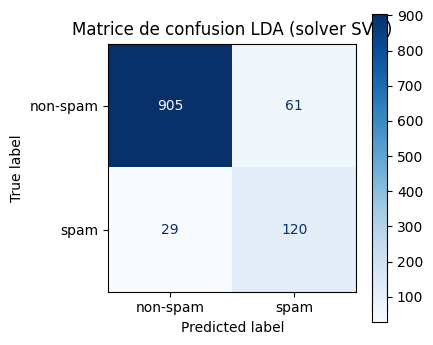

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Charger les données
sms_df = pd.read_csv(csv_path, encoding="latin-1")
texts = sms_df["sms"].astype(str)
labels = sms_df["label"].astype(int)

# Pipeline : TF-IDF -> conversion dense -> LDA (solver SVD)
lda_pipeline = Pipeline(steps=[
    ("tfidf", TfidfVectorizer(
        tokenizer=tweet_tokenizer.tokenize,
        preprocessor=None,
        lowercase=False,
        min_df=2  # purge implicite des hapax
    )),
    ("to_dense", FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),
    ("lda", LinearDiscriminantAnalysis(solver="svd"))
])

# Validation croisée stratifiée (5 folds)
cv_scores = cross_val_score(lda_pipeline, texts, labels, cv=5, n_jobs=-1)
print("=== Validation croisée (5-fold StratifiedKFold) ===")
print(f"Accuracy moyenne : {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

# Apprentissage / évaluation sur split hold-out
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels,
    test_size=0.2,
    random_state=42,
    stratify=labels
 )
lda_pipeline.fit(X_train, y_train)
y_pred = lda_pipeline.predict(X_test)

print("\n=== Évaluation sur l'échantillon de test (20%) ===")
print(f"Accuracy : {accuracy_score(y_test, y_pred):.3f}")
print("\nClassification report :")
print(classification_report(y_test, y_pred, target_names=["non-spam", "spam"]))

# Afficher la matrice de confusion
fig, ax = plt.subplots(figsize=(4, 4))
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    display_labels=["non-spam", "spam"],
    cmap="Blues",
    normalize=None,
    ax=ax
)
ax.set_title("Matrice de confusion LDA (solver SVD)")
plt.show()

## 4. Kernelized LDA

The kernelized version of LDA is implemented as a kfda package. Its homepage is here: https://pypi.org/project/kfda/
To install it, suffice to run <t>pip3 install kfda</t> from your Python virtual environment.

### Question 6

Let $\boldsymbol{x}$ and $\boldsymbol{y}$ be any two columns of your D-T matrix (which you may assume TD-IDF normalized or not, it does not change the problem). Consider the inhomogeneous polynomial kernel 
$$k(\boldsymbol{x},\boldsymbol{y})= (1+<\boldsymbol{x},\boldsymbol{y}>)^d$$
where $d>0$ is integer.

- Suppose that $d=2$, and that the above kernel is used in a kernelized LDA. What are the new axes created in the feature space, that didn't exist when $d=1$? Which of these could be useful, and change the solution computed by LDA in the feature space ?
- If the input data consists of $n$ samples, what is the time complexity of K-FDA ? 
- Try to classify using this setup, and report your results. Then increase $n$, from 2 to 4. You will very likely encounter some overflow issues. If it happens, explain what is wrong, and add some code to preprocess the data to circumvent it.

In [5]:
### Your answer here

### Question 7

We will now slightely improve the above kernel by replacing the natural dot product 
$$<\boldsymbol{x},\boldsymbol{y}>$$ 
by 
$$ \sum_i \min(\boldsymbol{x}_i, \boldsymbol{y}_i) $$
resulting in

$$f(\boldsymbol{x},\boldsymbol{y})= (1+\sum_i \min(\boldsymbol{x}_i, \boldsymbol{y}_i) )^n$$

Is $f$ a positive semidefinite kernel ? Either prove that it is, or give a counter-example.

### Question 8

Irrespective of your answer to question 8, try kfda with $f$ as its kernel. Looking at the source code https://github.com/concavegit/kfda/blob/master/kfda/kfda.py you will notice (line 92) that it relies on the paiwise_kernels function from sklearn to compute the Gram matrix. 

According to sklearn documentation https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.pairwise_kernels.html the kernel parameter can be a callable, hence you can supply a function of your own as the kernel argument, possibly using the keywords field (kwds).

Report your classification results, possibly varying $n$ (be reasonable with values, high $n$ may cause floating point exceptions, as in the last question). You should likely obtain decent (~ 75% accuracy, say) but not outstanding results.  This, however, is highly dependent on the dataset and classes you chose.

In [ ]:
### Your answer here

### Question 9

One reason why the obtained accuracy is not fantastic is that the vector model we are using is blind to bigrams. For instance, we may encounter (normalized) words "donald", and "trump" separately in a document, but this is very different from "donald trump".

One way to fix this is to include bigrams in the vocabulary : for two consecutive words, like "donald trump", we would add a synthetic word "donald_trump" to the vocabulary. 

Add an extra "bigram" parameter to voc_from_csv() to do so, and compare your results to those of question 9. Bigrams can be generated very simply using a code similar to this one:

In [4]:
w=['I','think','traveling','to','Rio','next','winter','would','be','great']
[w[i]+'_'+w[i+1] for i in range(0,len(w)-1)]

['I_think',
 'think_traveling',
 'traveling_to',
 'to_Rio',
 'Rio_next',
 'next_winter',
 'winter_would',
 'would_be',
 'be_great']